<a href="https://colab.research.google.com/github/RupaliGarg0906/Learn_AI_ML/blob/master/ComputerVision_FaceRecognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all required libraries
from google.colab import drive
from zipfile import ZipFile
from keras.models import load_model
from keras.models import Model
import cv2
import os
import numpy as np


In [2]:
#mount the drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extract the zip file
with ZipFile('/content/drive/My Drive/Colab Notebooks/Colab datasets/dataset/Aligned Face Dataset from Pinterest.zip') as z:
  z.extractall('/content/drive/My Drive/Colab Notebooks/Colab datasets/AlignedFaceDataset1')

In [3]:
%cd '/content/drive/My Drive/Colab Notebooks/Colab datasets/AlignedFaceDataset1'
%ls



/content/drive/My Drive/Colab Notebooks/Colab datasets/AlignedFaceDataset1
pins/  PINS/  vgg_face_weights.h5


In [3]:
#Create class and it s function to procees and store the image
class Generate_Image():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file
        a= self.base+ self.name+ self.file
        #print(a.type)

    def _repr_(self):
        #print("base:",self.base,"name:",self.name,"file:",self.file)
        a= self.base+ '/'+self.name+'/'+self.file
        return a

    def get_path(self):
        #print("base:",self.base,"name:",self.name,"file:",self.file)
        a= self.base+ '/'+self.name+'/'+self.file
        return str(a)
    
    


In [4]:
#Store object for eah image in array dataset. To process the information use generted function Generate_Image
import numpy as np
import matplotlib.pyplot as plt
def load_dataset(path):
#path='/content/drive/My Drive/Colab Notebooks/Colab datasets/AlignedFaceDataset1/PINS'
#if True:
  dataset=[]
  for folder in os.listdir(path):
    for img in os.listdir(os.path.join(path,folder)):
      ext=os.path.splitext(img)[1]
      if (ext=='.jpg' or ext=='.jpeg'):     #only include images with jpg or jpeg extension
        #print(Image(path,folder,img))
        #obj=Generate_Image(path,folder,img)
        dataset.append(Generate_Image(path,folder,img))
  return (np.array(dataset))

In [5]:
#load array with images in dataset
dataset=load_dataset('/content/drive/My Drive/Colab Notebooks/Colab datasets/AlignedFaceDataset1/PINS')

In [6]:
#Load image from dataset
def load_image(path):
  #print(path)
  img=cv2.imread(path,1)
  return img[...,::-1]

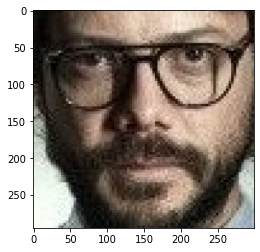

In [7]:
from random import randint
i =100
a=load_image(dataset[i].get_path())
plt.imshow(a)
  
  

In [10]:
#Define model
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.models import Sequential

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model


In [11]:
#Load pre-defined weights vgg_face_weights.h5
vgg_model=vgg_face()
vgg_model.load_weights('/content/drive/My Drive/Colab Notebooks/Colab datasets/AlignedFaceDataset1/vgg_face_weights.h5')

#Define model inputs and outputs
vgg_face_predictor=Model(inputs=vgg_model.layers[0].input,outputs=vgg_model.layers[-2].output)


In [68]:
#Create embedding for all images
print(dataset.shape[0])
embeddings=np.zeros((dataset.shape[0],2622),dtype=float)
k=0
for i,m in zip(dataset,range(0,dataset.shape[0])):
  #if k==100:
  #  break
  img=cv2.imread(i.get_path())
  img=cv2.resize(img,(224,224))
  img=img/255.
  #print((np.expand_dims(img, axis=0)).shape)
  prediction=vgg_face_predictor(np.expand_dims(img, axis=0))[0]
  embeddings[m]=prediction
  #k=k+1
  

10770


In [13]:
del i,m,img,prediction

In [147]:
embeddings_1=embeddings
del embeddings

In [164]:
#Define distance function to calculate the difference between embeddings
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

ditance between similar images is 0.1287560574050348 and distance between different images is 0.5953256862821881


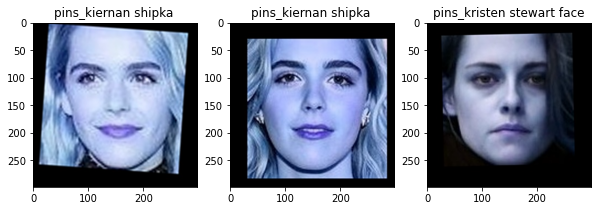

In [179]:
#Define function show_pairs to take a look at distance for similar and different image
def show_pairs(i, j, k):
  plt.figure(figsize=(10, 10))
  img1=cv2.imread(dataset[i].get_path())
  img2=cv2.imread(dataset[j].get_path())
  img3=cv2.imread(dataset[k].get_path())
  #img3=cv2.imread(img3)
  ax=plt.subplot(1,3,1)
  plt.imshow(img1)
  plt.title(dataset[i].name)
  ax=plt.subplot(1,3,2)
  plt.imshow(img2)
  plt.title(dataset[j].name)
  ax=plt.subplot(1,3,3)
  plt.imshow(img3)
  plt.title(dataset[k].name)
  dis1 = distance(embeddings_1[i],embeddings_1[j])
  dis2 = distance(embeddings_1[i],embeddings_1[k])
  print("ditance between similar images is {} and distance between different images is {}".format(dis1,dis2))
  #print("ditance between similar images is {} and distance between different images is {}".format(distance(embeddings[img2],embeddings[img3])))

#verify distance between embefddings
i=randint(0,dataset.shape[0]-100)
show_pairs(i,i+2,i+100)

ditance between similar images is 0.2488888814413612 and distance between different images is 0.3886027938903722


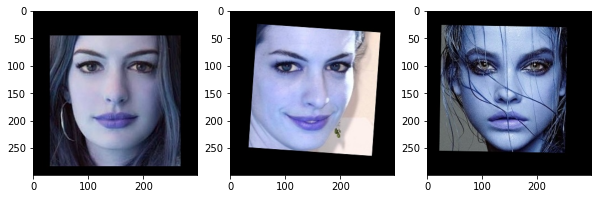

In [172]:
#Verify embedding generated and its distance
print(embeddings_1[1])

[ 0.03728862  0.0048159  -0.00364849 ... -0.00598707  0.00597386
  0.02078571]


1. Create train and test dataset
2. Every 9 th image will be considered in test set

In [180]:
#index=100//9
#X_train=np.zeros((100-shape,embeddings_1.shape[1]))
#X_test=np.zeros((shape,embeddings_1.shape[1]))
#Y_train=np.zeros((100-shape,embeddings.shape[1]))
#Y_test=np.zeros((shape,embeddings.shape[1]))
#j=0
#k=0
#Y_train.astype(str)
#Y_test.astype(str)

#print(X_train.shape,X_test.shape)
#for i in range(1,101):
#  print(i)
#  if (i%9==0):
#    print("j is",j)
#    X_test[j]=embeddings[i-1]
#    print(dataset[i-1].name)
#    Y_test[j]=dataset[i-1].name
#    j=j+1
#  else:
#    X_train[k]=embeddings[i-1]
#    Y_train[k]=dataset[i-1].name
#    k=k+1
#print(X_train.shape,X_test.shape)*/

In [181]:
#shape=dataset.shape[0]
#del X_Train,X_Test
shape=dataset.shape[0]
print(shape)
index_train =np.arange(shape) % 9 != 0     #every 9th example goes in test data and rest go in train data
index_test = np.arange(shape) % 9 == 0
print(index_train.shape,embeddings_1.shape)
Train_X = embeddings_1[index_train]
Test_X = embeddings_1[index_test]

#print(dataset[:199][index_train].shape)
targets_train=np.array([d.name for d in dataset[index_train]])
#print(targets.shape,X_Train.shape)
targets_test=np.array([d.name for d in dataset[index_test]])
print(targets_test.shape,Test_X.shape)

10770
(10770,) (10770, 2622)
(1197,) (1197, 2622)


In [182]:
print(targets_train.shape,targets_test.shape)

(9573,) (1197,)


In [185]:
#Apply Label encoder to convert target variable Y_Train and Y_Test into categorical varible
print(targets_train.shape)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets_train=le.fit_transform(targets_train)
targets_test=le.fit_transform(targets_test)
print(targets_test)

(9573,)
[ 0  0  0 ... 99 99 99]


In [186]:
# Standarize features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(Train_X)
X_test=sc.fit_transform(Test_X)


In [187]:
#use Principal Component analysis to reduce the dimensionality
from sklearn.decomposition import PCA
pca=PCA(n_components=12)
pca.fit_transform(X_train)
pca.fit_transform(X_test)

array([[-20.0104038 ,  -6.07830448,  -7.75143519, ...,   1.38594561,
         -7.21188146,   8.67322086],
       [-22.46292418,  14.90850288, -11.3440052 , ...,  -2.86676359,
         -6.94810862,  10.47443572],
       [-14.64207077,   1.39170761,   0.16686604, ...,  -2.14928093,
         -7.04576936,   7.18919748],
       ...,
       [ 14.96819926, -20.01741097,  -4.42989302, ...,  -3.27063019,
          5.92582434,  -2.54189395],
       [ 17.56249808,   0.32373621,   1.59807344, ...,  -0.87455495,
         14.86688811,   1.67786749],
       [ 14.19074705, -25.43925927,  14.93323574, ...,  -4.95111706,
         -0.05791854,  -3.89346502]])

In [188]:
#apply SVM classifier to classify the images
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(X_train,targets_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_pred,targets_test),metrics.precision_score,metrics.recall_score)

Originally img is 7
Predicted  img is 7


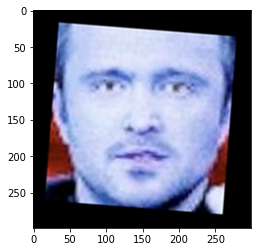

In [197]:
i =randint(0,X_test.shape[0]//9)*9
img=cv2.imread(dataset[i].get_path())
plt.imshow(img)
print("Originally img is {}".format(y_pred[i]))
print("Predicted  img is {}".format(targets_test[i]))